In [123]:
from tqdm.auto import tqdm
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

In [116]:
def zero_padding(image, p):
    if p == 0:
        return image.copy()
    padded_image = np.zeros([2*p + image.shape[0], 2*p + image.shape[1], image.shape[2]])
    print(padded_image[p:-p, p:-p, :].shape)
    padded_image[p:-p, p:-p, :] = image
    
    return padded_image

def normalized_cross_correlation(patch1,patch2):
    norm_p1 = patch1 - np.mean(patch1)
    norm_p2 = patch2 - np.mean(patch2)
    res = np.sum(norm_p1 * norm_p2)
    std = np.std(patch1) *np.std(patch2)
    if std == 0:
        return 0
    return res/std

In [136]:

def myCorr(image:np.ndarray, kernels:np.ndarray ,stride:int, pad:int, n_ker:int, norm:bool, corr:bool, actv:bool):
    
    if len(image.shape) != 3:
        raise Exception('invalid image shape image.shape < 3')
    
    k = kernels[0].shape[0] 
    h1 = (image.shape[0]-k+2*pad)/s+1
    w1 = (image.shape[1]-k+2*pad)/s+1
    print(h1,w1)
#     if w1 % 1 != 0 or h1 % 1 != 0:
#         raise Exception('invalid parameters: stride or padding')

    w1 = int(w1)
    h1 = int(h1)
    padded_image = zero_padding(image,pad).astype('float64')
    output = np.zeros([h1,w1,n_ker])
    args = []
    for c_out in range(n_ker):
        if not corr:# flip kernels
            for ik in range(len(kernels[c_out])):
                kernels[c_out][ik] = np.flipud(np.fliplr(kernels[c_out][ik]))
                
        kernel = kernels[c_out]
        print(padded_image.shape)
        for row in tqdm(range(0,padded_image.shape[0]-2*stride,stride), desc='rows: '):
            for col in range(0,padded_image.shape[1]-2*stride,stride):
                    for dim in range(padded_image.shape[2]):
                        if norm:
                            result = normalized_cross_correlation(kernel[:,:,dim],padded_image[row: row+k, col: col+k,dim])
                        else:
                            result = np.sum(kernel[:,:,dim] * padded_image[row: row+k, col: col+k,dim])

                        args.append(result)
                        
                    if actv:
                        output[int(row/s),int(col/s),c_out] = max(0.0,np.max(args)) #RElu
                    else:
                        output[int(row/s),int(col/s),c_out] = np.max(args) 
                    args=[]
    return output


In [213]:

def myCorr(image:np.ndarray, kernels:np.ndarray ,stride:int, pad:int, n_ker:int, norm:bool, corr:bool, actv:bool):
    
    if len(image.shape) != 3:
        raise Exception('invalid image shape image.shape < 3')
    
    k = kernels[0].shape[0] 
    h1 = int((image.shape[0]-k+2*pad)/stride+1)
    w1 = int((image.shape[1]-k+2*pad)/stride+1)
    
    padded_image = zero_padding(image,pad).astype('float64')
    output = np.zeros([h1,w1,n_ker])
    args = []
    for c_out in range(n_ker):
        if not corr:# flip kernels
            for ik in range(len(kernels[c_out])):
                kernels[c_out][ik] = np.flipud(np.fliplr(kernels[c_out][ik]))
                
        kernel = kernels[c_out]
        x_stride = 0
        for col in tqdm(range(0,output.shape[1]), desc='rows: '):   
            y_stride = 0 
            for row in range(0,output.shape[0]):
                for dim in range(padded_image.shape[2]): 
                    patch = padded_image[(row + y_stride):(row + y_stride + k), (col + x_stride) :(col + x_stride + k),dim]
                    if norm:
                        result = normalized_cross_correlation(kernel[:,:,dim],patch)
                    else: 
                        result = sum(kernel[:,:,dim]*patch) 
                    args.append(result) 
                  
                if actv:
                    output[row, col, c_out] = max(0, np.max(args)) 
                else:
                    output[row, col, c_out] = np.max(args) 

                args = [] 
                y_stride += stride - 1
            x_stride += stride - 1
    return output


In [218]:
image = plt.imread('Lenna.png')
k1=[[1,1,1],
    [1,1,1],
    [1,1,1]]

k2=[[0,-1,0],
    [0,1,1],
    [-1,1,-1]]

k3=[[1,0,1],
    [-1,1,0],
    [-1,1,1]]

kernel1 = np.array([k1,k2,k3])

k4=[[1,1,0],
    [0,0,-1],
    [0,0,1]]

k5=[[-1,0,-1],
    [-1,1,-1],
    [-1,0,1]]

k6=[[1,1,-1],
    [-1,1,1],
    [1,1,0]]

kernel2 = np.array([k4,k5,k6])
kernels = [kernel1,kernel2]

(512, 512, 3)


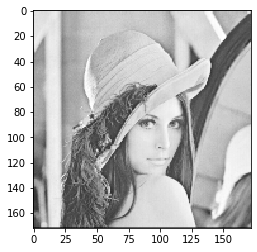

In [219]:
N=2
s=1
pad=1
norm = True
actv = True
corr = False
output = myCorr(image=image ,kernels = kernels, stride=3, pad=2, n_ker=2, norm=False, corr=False, actv=False)
plt.imshow(output[:,:,1],cmap='gray')

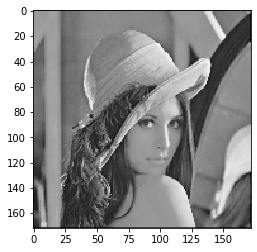

In [220]:
plt.imshow(output[:,:,0],cmap='gray')

(1116, 1772, 3)


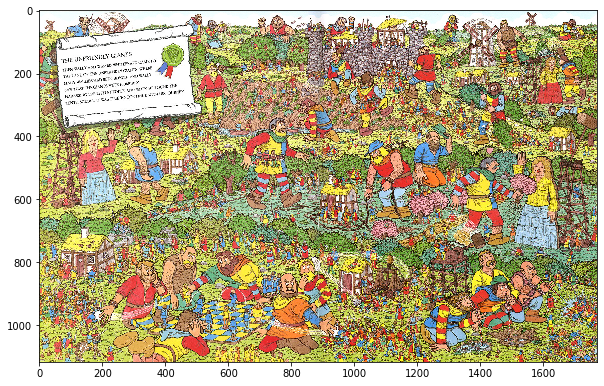

In [221]:
waldo = plt.imread('./1_8UsxczpS3-N-Yg9S7hP-Zw.jpg')
print(waldo.shape)
plt.figure(figsize=[10,10])
plt.imshow(waldo)

In [ ]:
w_kernel = waldo[700:700+55,305:305+55]
k = w_kernel.shape[0]
s=10
pad = 2
h1 = (waldo.shape[0]-k+2*pad)/s+1
w1 = (waldo.shape[1]-k+2*pad)/s+1
print(h1,w1)
output = myCorr(image=waldo, kernels=np.array([w_kernel]),stride=1 , pad=0, n_ker=1, norm=True, corr=True, actv=False)

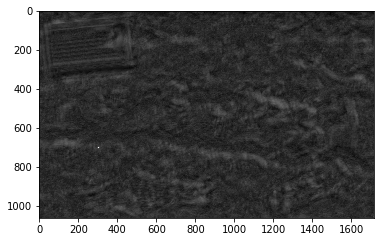

In [224]:
plt.imshow(output[:,:,0],cmap='gray')